**Import library's**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import imutils
from skimage.feature import  peak_local_max
#from skimage.morphology import watershed
from scipy import ndimage

**Create display function**

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

**Load the image**

In [3]:
sep_coins = cv2.imread("C:/Users/Downloads/COSC/Week-5/images/coins.png")

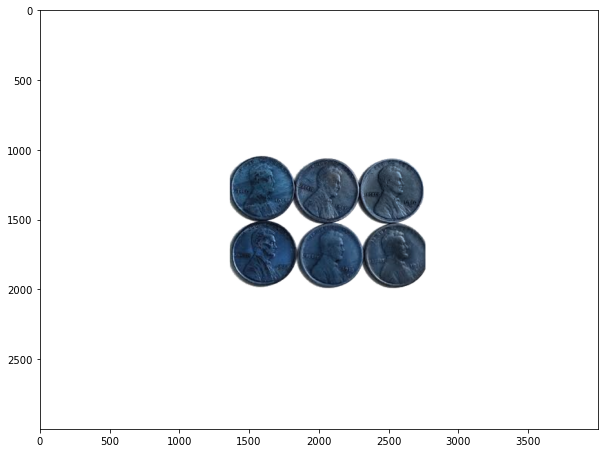

In [4]:
display(sep_coins)

## Segment this images using the simple techniques

**Apply median BLUR**

In [5]:
sep_blur = cv2.medianBlur(sep_coins, 25)

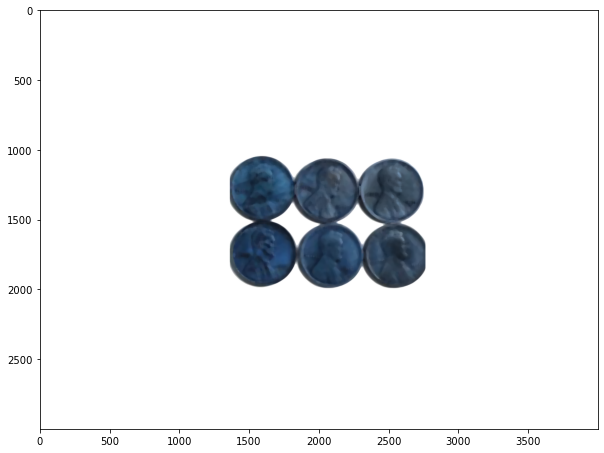

In [6]:
display(sep_blur)

**Convert to Grayscale**

In [7]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)

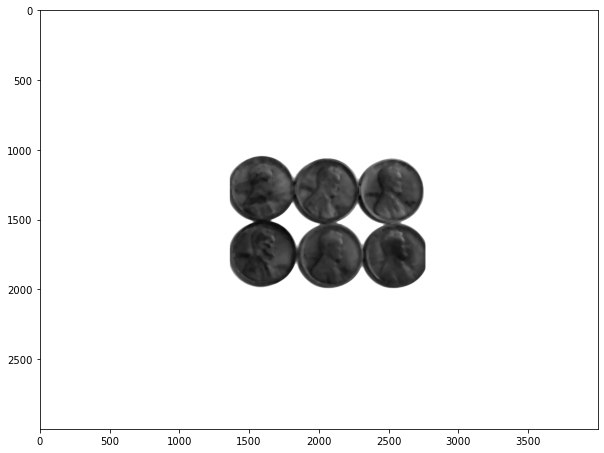

In [8]:
display(gray_sep_coins)

**Apply Binary Thresholding**

In [9]:
ret, sep_thresholding = cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY_INV)

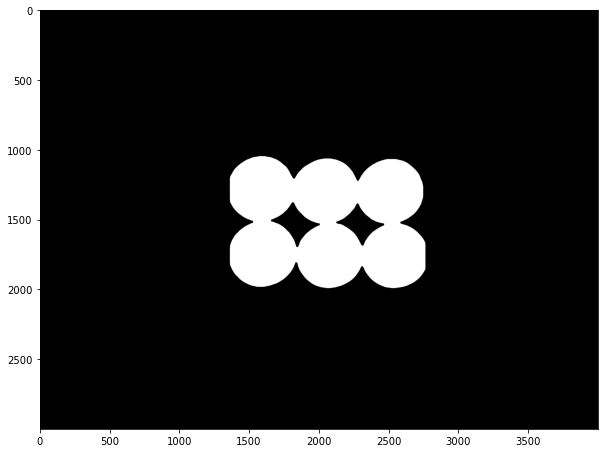

In [10]:
display(sep_thresholding)

**Find Contours**

In [11]:
contours, hierarchy = cv2.findContours(sep_thresholding.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE) #https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html

In [12]:
hierarchy

array([[[-1, -1,  1, -1],
        [ 2, -1, -1,  0],
        [-1,  1, -1,  0]]], dtype=int32)

In [13]:
contours

(array([[[1571, 1046]],
 
        [[1570, 1047]],
 
        [[1566, 1047]],
 
        ...,
 
        [[1615, 1047]],
 
        [[1611, 1047]],
 
        [[1610, 1046]]], dtype=int32),
 array([[[2273, 1385]],
 
        [[2274, 1384]],
 
        [[2278, 1384]],
 
        [[2279, 1385]],
 
        [[2281, 1385]],
 
        [[2284, 1388]],
 
        [[2284, 1389]],
 
        [[2285, 1390]],
 
        [[2285, 1391]],
 
        [[2286, 1392]],
 
        [[2286, 1393]],
 
        [[2287, 1394]],
 
        [[2287, 1395]],
 
        [[2288, 1396]],
 
        [[2288, 1397]],
 
        [[2289, 1398]],
 
        [[2289, 1400]],
 
        [[2290, 1401]],
 
        [[2290, 1403]],
 
        [[2291, 1404]],
 
        [[2291, 1405]],
 
        [[2292, 1406]],
 
        [[2292, 1407]],
 
        [[2293, 1408]],
 
        [[2293, 1410]],
 
        [[2295, 1412]],
 
        [[2295, 1413]],
 
        [[2296, 1414]],
 
        [[2296, 1415]],
 
        [[2297, 1416]],
 
        [[2297, 1417]],
 
        [[

In [14]:
len(contours)

3

In [15]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.urs(sedrawContop_coins, contours, i, (255, 0, 0), 10)

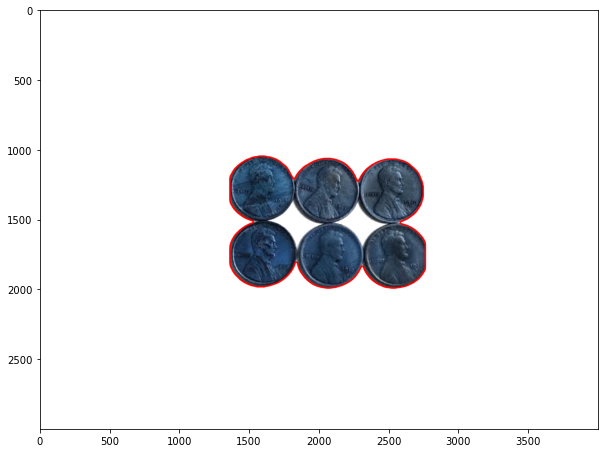

In [16]:
display(sep_coins)

[INFO] 1 unique contours found


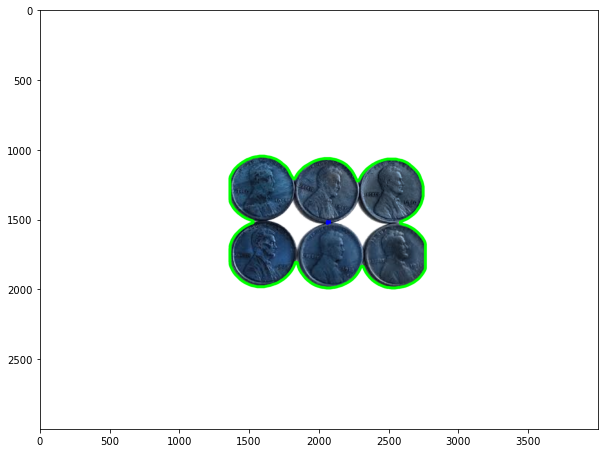

In [15]:
# find contours in the thresholded image
cnts = cv2.findContours(sep_thresholding.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("[INFO] {} unique contours found".format(len(cnts)))
# loop over the contours
for (i, c) in enumerate(cnts):
    # draw the contour
    ((x, y), _) = cv2.minEnclosingCircle(c)
    cv2.drawContours(sep_coins, [c], -1, (0, 255, 0), 20)
# show the output image
display(sep_coins)

In [16]:
cnts

(array([[[1571, 1046]],
 
        [[1570, 1047]],
 
        [[1566, 1047]],
 
        ...,
 
        [[1615, 1047]],
 
        [[1611, 1047]],
 
        [[1610, 1046]]], dtype=int32),)

## Segment this images using the Watershed Algorithm

**Load the image**

In [75]:
img = cv2.imread("C:/Users/Downloads/COSC/Week-5/images/coins.png")#Balls-A-Multi.jpg #coins.png

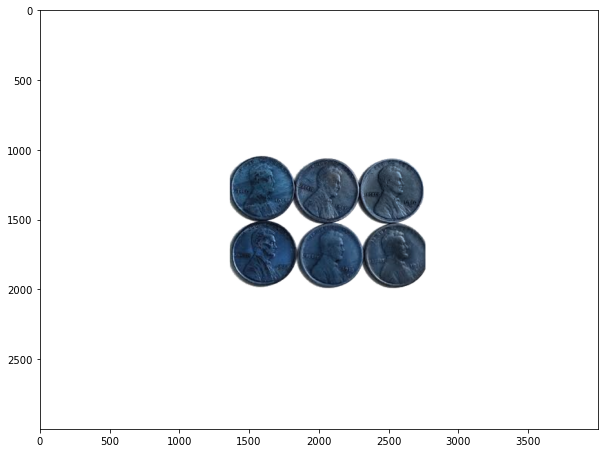

In [76]:
display(img)

**Apply median BLUR**

In [77]:
img = cv2.medianBlur(img,35)

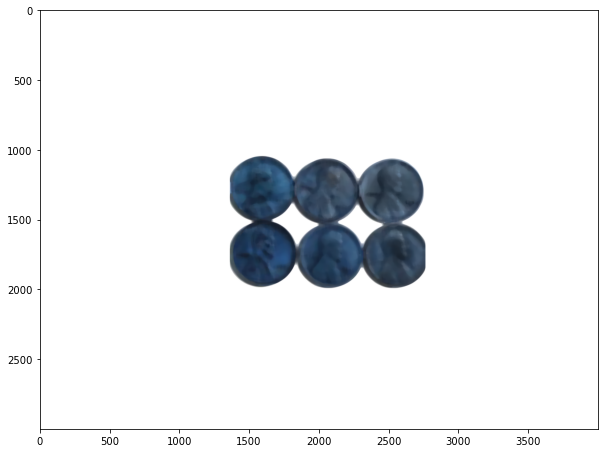

In [78]:
display(img)

**Convert to Grayscale**

In [79]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

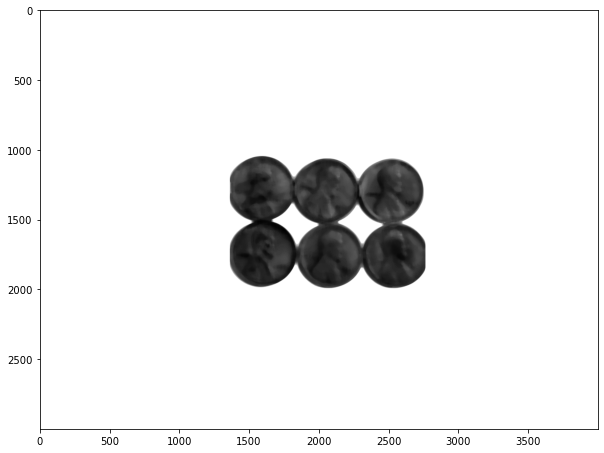

In [80]:
display(gray)

**Apply Binary Thresholding add OTSU**

In [81]:
ret, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

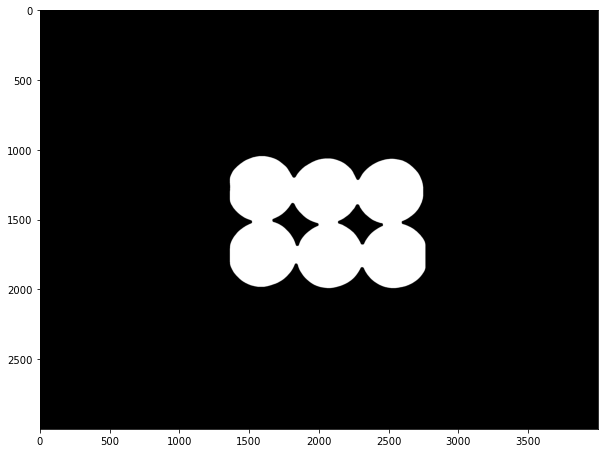

In [82]:
display(threshold)

**Removing noises (Optional), but for complex image this is essential**

In [83]:
kernel = np.ones(shape=(3, 3), dtype=np.uint8)

In [84]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [85]:
opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel, iterations=2)
#https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

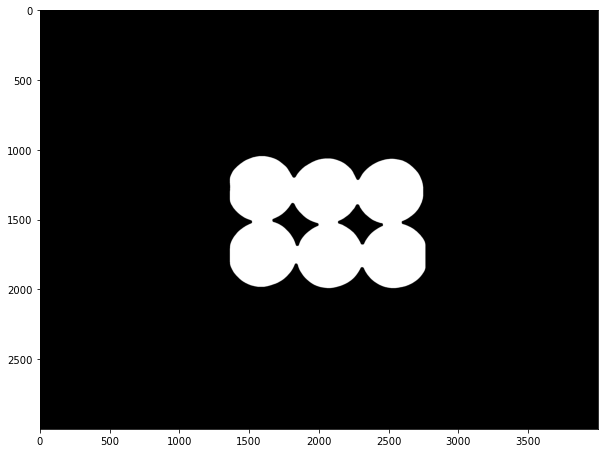

In [86]:
display(opening)

### Using distance transform

In [87]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

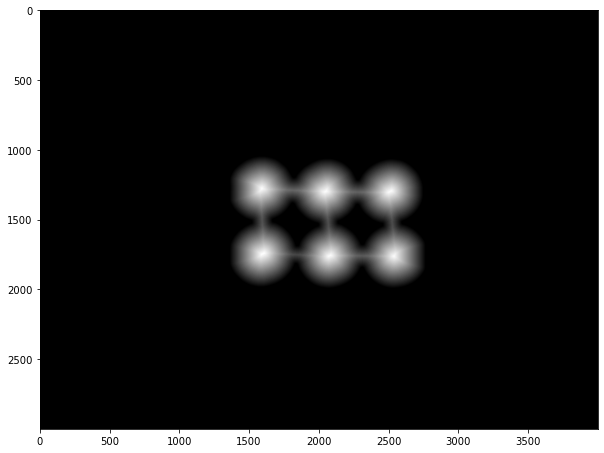

In [88]:
display(dist_transform)

In [89]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

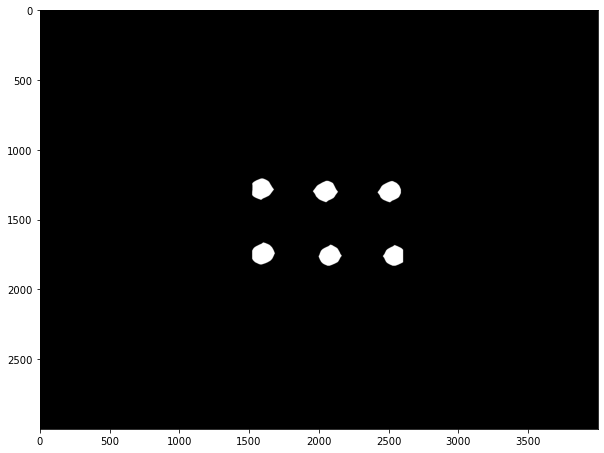

In [90]:
display(sure_fg)

In [91]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

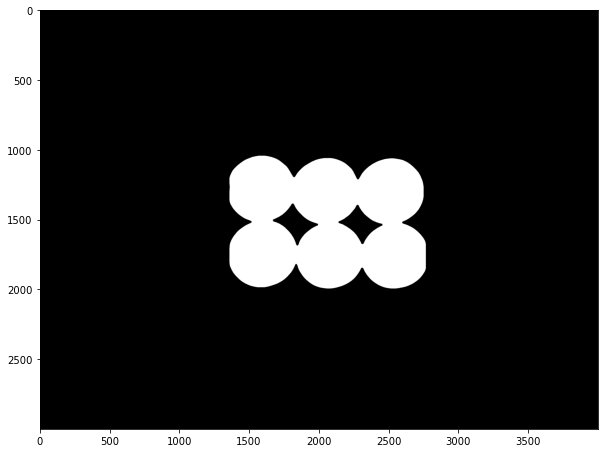

In [92]:
display(sure_bg)

In [93]:
sure_fg = np.uint8(sure_fg)

In [94]:
unknown = cv2.subtract(sure_bg, sure_fg)

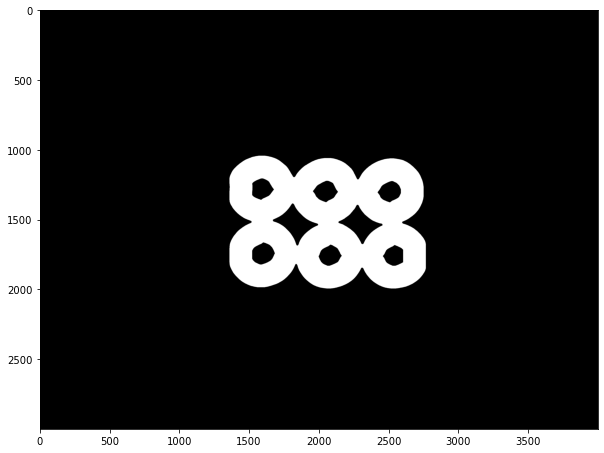

In [95]:
display(unknown)

### Creating the label markers for the watershed algorithm

**Step 1: getting the markers themselves**

In [96]:
ret, markers = cv2.connectedComponents(sure_fg)

In [97]:
markers = markers + 1

In [98]:
markers

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [99]:
markers[unknown == 255] = 0

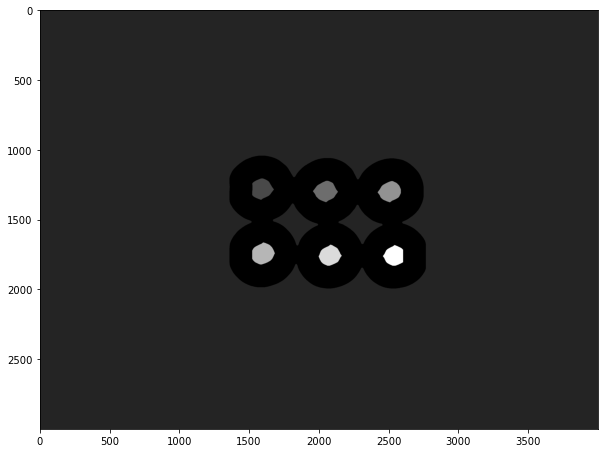

In [100]:
display(markers)

**Step 2: Apply the watershed algorithm to the markers**

In [101]:
markers = cv2.watershed(img, markers)

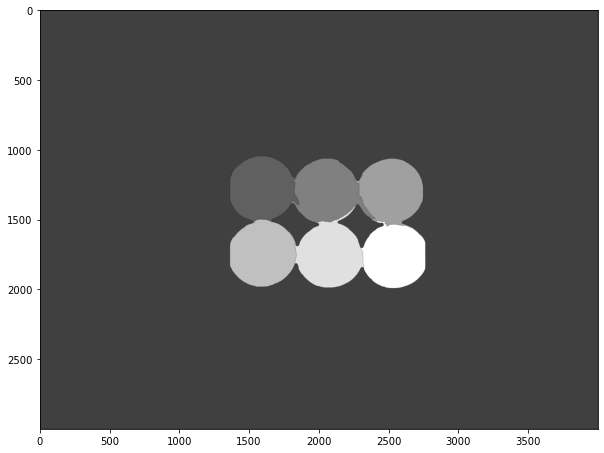

In [102]:
display(markers)

**Step 3:Find Contours**

In [103]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img, contours, i, (255, 0, 0), 10)

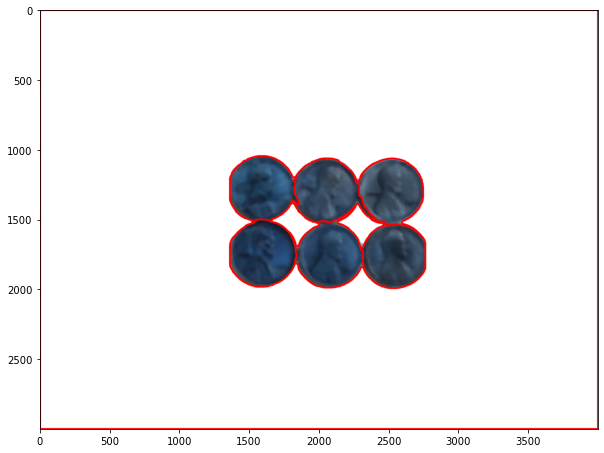

In [104]:
display(img)

In [38]:
len(contours)

11